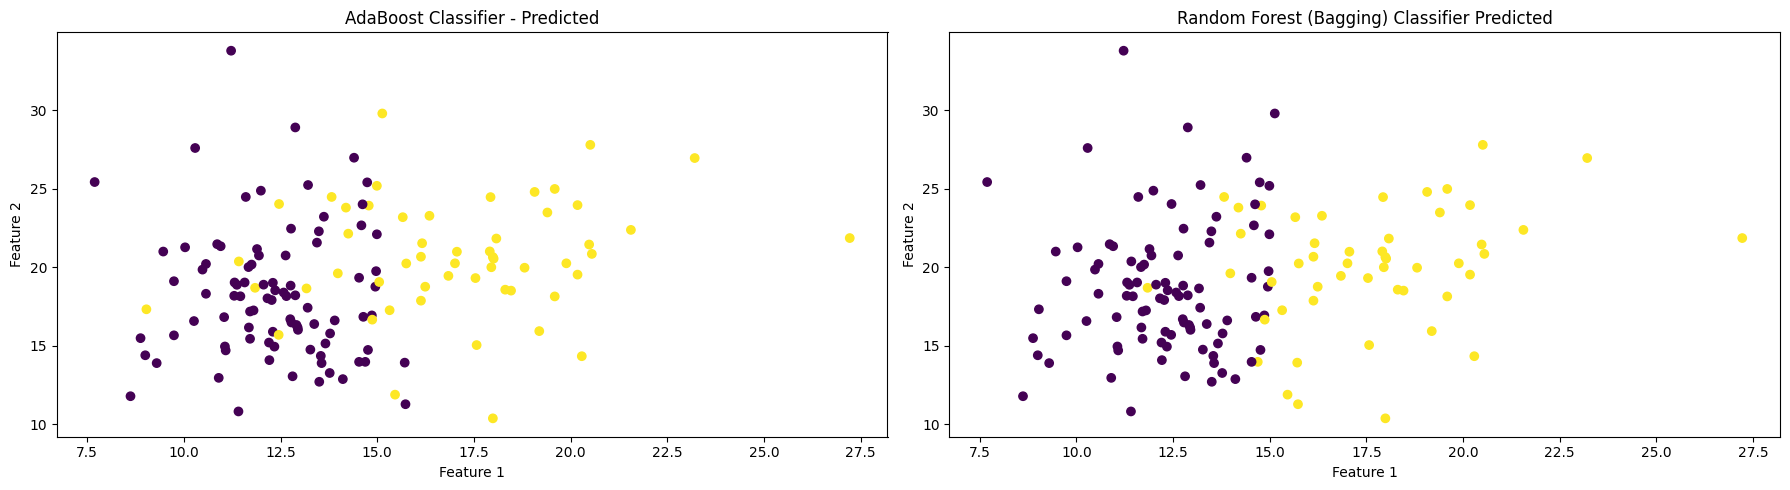

For Boosting: F1 Score 0.95, Accuracy 0.97
For Bagging: F1 Score 0.88, Accuracy 0.91


In [1]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


breast_cancer = load_breast_cancer()
x = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Categorical.from_codes (breast_cancer.target, breast_cancer.target_names) # Transforming string Target to an int
encoder = LabelEncoder()
binary_encoded_y = pd.Series(encoder.fit_transform(y))
train_x, test_x, train_y, test_y = train_test_split(x, binary_encoded_y, random_state=1)

#AdaBoost Classifier
clf_boosting = AdaBoostClassifier(
  DecisionTreeClassifier(max_depth=1),
  n_estimators = 200
)
clf_boosting.fit(train_x, train_y)
predictions_boosting = clf_boosting.predict(test_x)
f1_boosting = f1_score(test_y, predictions_boosting)
accuracy_boosting = accuracy_score(test_y, predictions_boosting)

# Random Forest Classifier (Bagging)
clf_bagging = RandomForestClassifier(n_estimators=288, max_depth=1)
clf_bagging.fit(train_x, train_y)
predictions_bagging = clf_bagging.predict(test_x)
f1_bagging = f1_score (test_y, predictions_bagging)
accuracy_bagging = accuracy_score (test_y, predictions_bagging)

# Scatterplot for AdaBoost
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.scatter(test_x.iloc[:,0], test_x.iloc[:, 1], c=predictions_boosting)
plt.title("AdaBoost Classifier - Predicted")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Scatterplot for Random Forest (Bagging)
plt.subplot(1, 2, 2)
plt.scatter(test_x.iloc[:, 0], test_x.iloc[:, 1], c=predictions_bagging)
plt.title("Random Forest (Bagging) Classifier Predicted")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

#F1 scores and accuracies
print("For Boosting: F1 Score {:.2f}, Accuracy {:.2f}".format(f1_boosting, accuracy_boosting))
print("For Bagging: F1 Score {:.2f}, Accuracy {:.2f}".format(f1_bagging, accuracy_bagging))